# Training models and Model validation with scikit-learn

<font size=6>http://tinyurl.com/4k2bsx22</font>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

In [2]:
data_url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt"
response = requests.get(url=data_url)

In [26]:
#print(response.text)

In [4]:
cat_cols = ['fruit_label', 'fruit_name', 'fruit_subtype']
float_cols = ['mass', 'width', 'height', 'color_score']
rows = response.text.split('\r\n')
data = [r.split('\t') for r in rows[1:]]

df_fruits = pd.DataFrame(data, columns= cat_cols+float_cols)
df_fruits.dropna(inplace=True)

df_fruits[cat_cols] = df_fruits[cat_cols].astype('category')
df_fruits[float_cols] = df_fruits[float_cols].astype('float')
df_fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [5]:
print(df_fruits.shape)

(59, 7)


In [6]:
print(df_fruits['fruit_name'].unique())

['apple', 'mandarin', 'orange', 'lemon']
Categories (4, object): ['apple', 'lemon', 'mandarin', 'orange']


In [7]:
print(df_fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


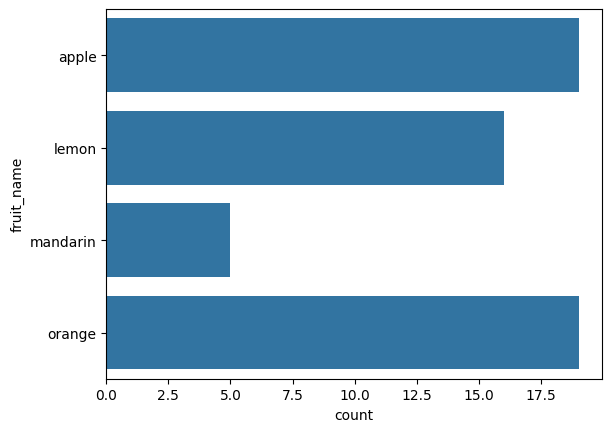

In [8]:
sns.countplot(df_fruits['fruit_name'], label="Count")
plt.show()

In [9]:
df_fruits.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [10]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = df_fruits[feature_names]
y = df_fruits['fruit_label']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Train-test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,shuffle=True)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train, X_test)
# [0.27857143 0.41176471 0.49230769 0.72972973]

[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]
 [0.27142857 0.52941176 0.50769231 0.37837838]
 [0.31428571 0.41176471 0.46153846 0.67567568]
 [0.2        0.         0.72307692 0.48648649]
 [0.3        0.35294118 0.52307692 0.7027027 ]
 [0.27857143 0.44117647 0.50769231 0.64864865]
 [0.14285714 0.02941176 0.63076923 0.48648649]
 [0.30714286 0.5        0.47692308 0.75675676]
 [0.14285714 0.14705882 0.56923077 0.45945946]
 [0.45714286 0.5        0.8        0.59459459]
 [0.28571429 0.55882353 0.47692308 0.37837838]
 [0.01428571 0.         0.04615385 0.59459459]
 [0.47857143 0.58823529 0.61538462 0.72972973]
 [0.28571429 0.52941176 0.53846154 0.32432432]
 [0.19285714 0.05882353 0.64615385 0.43243243]
 [0.3        0.5        0.53846154 0.83783784]
 [0.14285714 0.05882353 0.53846154 0.45945946]
 [0.36428571 0.38235294 0.58461538 1.        ]
 [0.31428571 0.44117647 0.56923077 0.40540541]
 [1.         

In [13]:
X.shape

(59, 4)

In [14]:
X_train.shape

(44, 4)

In [15]:
X_test.shape

(15, 4)

#### Train-test Model

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 4 2]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         8
           4       0.50      1.00      0.67         2

    accuracy                           0.73        15
   macro avg       0.79      0.88      0.78        15
weighted avg       0.84      0.73      0.72        15



### Train-validation-test Split

In [20]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# print(X_train, X_val, X_test)

### Cross-validation

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [22]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5) # cv = k-fold
y_pred = cross_val_predict(clf, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[0.75       0.91666667 0.83333333 0.83333333 0.90909091]
0.85 accuracy with a standard deviation of 0.06
[[13  0  2  4]
 [ 0  5  0  0]
 [ 2  0 17  0]
 [ 0  0  1 15]]
              precision    recall  f1-score   support

           1       0.87      0.68      0.76        19
           2       1.00      1.00      1.00         5
           3       0.85      0.89      0.87        19
           4       0.79      0.94      0.86        16

    accuracy                           0.85        59
   macro avg       0.88      0.88      0.87        59
weighted avg       0.85      0.85      0.84        59

